In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Tanjiaalam/carbon/main/thesis2%20(1).csv')
df

,Country,year,gdp,pp,carbonpercapital
0,Australia,1952,11824.00000,8595064.0,7.0042
1,Australia,1953,11963.00000,8782177.0,6.7676
2,Australia,1954,12419.00000,8970121.0,7.5627
3,Australia,1955,12795.00000,9165700.0,7.7107
4,Australia,1956,12924.00000,9371781.0,7.7925
...,...,...,...,...,...
2134,USA,2016,53015.00000,323015992.0,16.2469
2135,USA,2017,54007.76953,325084758.0,16.0197
2136,USA,2018,55334.73828,327096263.0,16.4340
2137,USA,2019,NaN,329064917.0,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['carbonpercapital_scaled'] = scaler.fit_transform(df['carbonpercapital'].values.reshape(-1,1))

In [ ]:
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df

,Country,year,gdp,pp,carbonpercapital,carbonpercapital_scaled
0,Australia,1952,11824.00000,8595064.0,7.0042,0.069338
1,Australia,1953,11963.00000,8782177.0,6.7676,0.066995
2,Australia,1954,12419.00000,8970121.0,7.5627,0.074870
3,Australia,1955,12795.00000,9165700.0,7.7107,0.076336
4,Australia,1956,12924.00000,9371781.0,7.7925,0.077146
...,...,...,...,...,...,...
2062,USA,2014,51664.00000,318673422.0,17.3306,0.171613
2063,USA,2015,52591.00000,320878312.0,16.7408,0.165772
2064,USA,2016,53015.00000,323015992.0,16.2469,0.160880
2065,USA,2017,54007.76953,325084758.0,16.0197,0.158630


In [ ]:
df.Country.unique()


array(['Australia', 'Bangladesh', 'Belgium', 'Brazil', 'Canada', 'China',
       'Colombia', 'Egypt', 'France', 'Germany', 'India', 'Indonesia',
       'Iran', 'Japan', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand',
       'Pakistan', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Turkey',
       'UAE', 'UK', 'USA'], dtype=object)

In [ ]:
melb = df[df['Country']== 'Belgium']

melb['year']=pd.to_datetime(melb["year"], format="%Y")
melb.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-99-ae51724bca90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['year']=pd.to_datetime(melb["year"], format="%Y")

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['year']=pd.to_datetime(melb["year"], format="%Y")



,Country,year,gdp,pp,carbonpercapital,carbonpercapital_scaled
134,Belgium,1952-01-01,9035.0,8727988.0,9.5628,0.094679
135,Belgium,1953-01-01,9274.0,8779267.0,9.3828,0.092897
136,Belgium,1954-01-01,9610.0,8832697.0,9.7065,0.096102
137,Belgium,1955-01-01,10010.0,8887275.0,10.3538,0.102513
138,Belgium,1956-01-01,10237.0,8942408.0,10.8226,0.107157


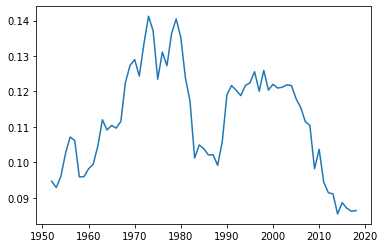

In [ ]:
from matplotlib import pyplot as plt
plt.plot(melb['year'], melb['carbonpercapital_scaled'])
plt.show()

In [ ]:
data = melb[['year', 'carbonpercapital_scaled']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
134,1952-01-01,0.094679
135,1953-01-01,0.092897
136,1954-01-01,0.096102
137,1955-01-01,0.102513
138,1956-01-01,0.107157


In [ ]:
m = NeuralProphet(n_lags=5, n_forecasts=2)
metrics_train = m.fit(df=data, freq="Y")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.507% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 98.507% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with dai

Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future=m.make_future_dataframe(data,periods=14)
forecast=m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.507% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 98.507% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 2.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO

Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,yhat2,ar1,ar2,trend,season_yearly
0,2014-01-01,0.085465,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,0.088635,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,0.087084,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,0.086217,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,0.086420,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-01,NaN,0.082417,NaN,0.000651,NaN,0.126029,-0.044263
6,2020-01-01,NaN,NaN,0.082978,NaN,0.001931,0.125267,-0.044220


In [ ]:
forecast = m.predict(data)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.507% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 98.507% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.551% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 98.551% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS


Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
df_fc = m.get_latest_forecast(forecast)
df_fc.head(3)

,ds,y,origin-0
0,2017-01-01,0.086217,0.086511
1,2018-01-01,0.086420,0.084275


In [ ]:
future=m.make_future_dataframe(data)
forecast=m.predict(future)
print(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.507% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 98.507% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined fr

Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


          ds         y     yhat1     yhat2       ar1       ar2     trend  \
0 2014-01-01  0.085465       NaN       NaN       NaN       NaN       NaN   
1 2015-01-01  0.088635       NaN       NaN       NaN       NaN       NaN   
2 2016-01-01  0.087084       NaN       NaN       NaN       NaN       NaN   
3 2017-01-01  0.086217       NaN       NaN       NaN       NaN       NaN   
4 2018-01-01  0.086420       NaN       NaN       NaN       NaN       NaN   
5 2019-01-01       NaN  0.082417       NaN  0.000651       NaN  0.126029   
6 2020-01-01       NaN       NaN  0.082978       NaN  0.001931  0.125267   

   season_yearly  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5      -0.044263  
6      -0.044220  


In [ ]:
forecast['yhat1'].astype(float)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.082417
6         NaN
Name: yhat1, dtype: float64

In [ ]:
forecast = m.predict(future, raw=True, decompose=False)
forecast.head()

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS


Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,step0,step1
0,2019-01-01,0.082417,0.082978
